In [1]:
%load_ext itikz
import itikz
from itikz import nicematrix as nM
import jinja2

import numpy as np
import sympy as sym

## Invoke itikz without using cell magic

# itikz.build_commands?
# itikz.fetch_or_compile_svg?

# 1. Examples from the Original Itikz Notebook 

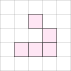

In [2]:
%%itikz --temp-dir --file-prefix implicit-demo- --template pic --use-xetex --scale 0.5
\draw[help lines] grid (5, 5);
\draw[fill=magenta!10] (1, 1) rectangle (2, 2);
\draw[fill=magenta!10] (2, 1) rectangle (3, 2);
\draw[fill=magenta!10] (3, 1) rectangle (4, 2);
\draw[fill=magenta!10] (3, 2) rectangle (4, 3);
\draw[fill=magenta!10] (2, 3) rectangle (3, 4);

In [3]:
%%itikz --temp-dir --template standalone --tex-packages=smartdiagram,amsfonts
\smartdiagramset{uniform sequence color=true,
sequence item border color=black,
sequence item font size=\footnotesize,
sequence item text color=white
}
\smartdiagram[sequence diagram]{
    $\mathbb{N}$,
    $\mathbb{Z}$,
    $\mathbb{Q}$,
    $\mathbb{R}$,
    $\mathbb{I}$,
    $\mathbb{C}$
}

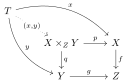

In [4]:
src = r"""
\documentclass[tikz]{standalone}
\usepackage{tikz-cd}
\usetikzlibrary{cd}

\begin{document}
\begin{tikzcd}
T
\arrow[drr, bend left, "x"]
\arrow[ddr, bend right, "y"]
\arrow[dr, dotted, "{(x,y)}" description] & & \\
& X \times_Z Y \arrow[r, "p"] \arrow[d, "q"]
& X \arrow[d, "f"] \\
& Y \arrow[r, "g"]
& Z
\end{tikzcd}
\end{document}
"""

itikz.fetch_or_compile_svg(src, prefix="cd_", working_dir="/tmp/itikz", full_err=False, debug=False)

# 2. Linear Algebra Examples

## 2.1 Row-echelon Form

### 2.2.1 Row Echelon Form Matrix: Numerical Example

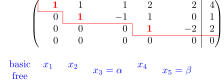

In [4]:
%%itikz --temp-dir --template standalone --tex-packages=nicematrix,tikz,relsize,amsmath --tikz-libraries=decorations.pathreplacing
% --nexec=4  --use-dvi --use-xetex 
\NiceMatrixOptions{code-for-last-row = \color{blue}, code-for-first-row = \color{red}}
$\begin{pNiceArray}{*5r|r}[left-margin = 4pt, first-col, last-row,
    code-before =
    {
    % ----------------------------------------------------------------------- Row-echelon form Path
    \tikz \draw[red] (row-1-|col-1) -- (row-2-|col-1)
                  -- (row-2-|col-2) -- (row-3-|col-2)
                  -- (row-3-|col-4) -- (row-4-|col-4)
                  -- (row-4-|col-7);
    }
]
    & \color{red}{\mathbf{1}}   & 1                       &  1 &  2                       &  2 & \;  4 \\
    & 0                         & \color{red}{\mathbf{1}} & -1 &  1                       &  0 & \;  1 \\
    & 0                         & 0                       &  0 &  \color{red}{\mathbf{1}} & -2 & \;  2 \\
    & 0                         & 0                       &  0 &  0                       &  0 & \;  0 \\
% ------------------------------------------------------------------------------------ Basic and Free Variables
\color{blue}{\begin{matrix} \\ \text{basic}\\ \text{free} \end{matrix}}
    & \begin{matrix} x_1        \\             \end{matrix}
    & \begin{matrix} x_2        \\             \end{matrix}
    & \begin{matrix}            \\  x_3=\alpha \end{matrix}
    & \begin{matrix} x_4        \\             \end{matrix}
    & \begin{matrix}            \\  x_5=\beta  \end{matrix}
    &
\end{pNiceArray}$

### 2.1.2 Stack of Matrices

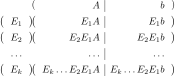

In [5]:
mat_rep = r'''
      &&                   A &                    b \\  \noalign{\vskip1.5mm}
E_1   &&               E_1 A &                E_1 b \\  \noalign{\vskip1.5mm}
E_2   &&           E_2 E_1 A &            E_2 E_1 b \\  \noalign{\vskip1.5mm}
\dots && \dots               & \dots                \\  \noalign{\vskip1.5mm}
E_k   && E_k \dots E_2 E_1 A &  E_k \dots E_2 E_1 b
'''
submatrix_locs=['{1-3}{1-4}','{2-3}{2-4}','{3-3}{3-4}','{5-3}{5-4}',
                '{2-1}{2-1}','{3-1}{3-1}','{5-1}{5-1}'
               ]
pivot_locs=[]
txt_with_locs=[]
mat_format='{ccrIr}'

itikz.fetch_or_compile_svg( jinja2.Template( nM.GE_TEMPLATE ).render( preamble=nM.preamble, extension=nM.extension,
                                                                      mat_rep=mat_rep, mat_format=mat_format, submatrix_locs=submatrix_locs, pivot_locs=pivot_locs, txt_with_locs=txt_with_locs),
                            prefix='test_', working_dir='/tmp/itikz', debug=False,
                            **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True), nexec=4, keep_file="/tmp/foo" )

## 2.2 Systeme

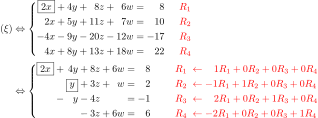

In [6]:
%%itikz --temp-dir  --file-prefix foo_  --template article --crop --tex-packages=systeme,amsmath,xcolor
%--use-dvi --use-xetex
% -----------------------------------------------------
\begin{flalign*}
(\xi)
& \Leftrightarrow \sysalign{r,r}\systeme[xyzw]{
      \boxed{2 x}  + 4 y  + 8 z   + 6 w   = 8     @\color{red}{R_1},
      2  x          + 5 y  + 11 z  + 7 w   = 10   @\color{red}{R_2},
      -4 x          -9  y  -20  z  -12 w   = -17  @\color{red}{R_3},
      4  x          + 8 y  + 13 z  + 18 w  = 22   @\color{red}{R_4}
      } \\
%
\sysautonum{\quad \color{red}{R_{*}\; \leftarrow \;}}
& \Leftrightarrow \sysautonum{\quad \color{red}{R_{*}\; \leftarrow \;}}
\sysalign{r,r}\systeme[xyzw]{
      \boxed{2 x}  + 4 y  + 8 z  + 6 w   = 8  @\color{red}{\ \;\;1 R_1 + 0 R_2 + 0 R_3 + 0 R_4},
                \boxed{y} + 3 z  +   w   = 2  @\color{red}{   -1 R_1 + 1 R_2 + 0 R_3 + 0 R_4},
                    -  y  - 4 z         = -1  @\color{red}{\ \;\;2 R_1 + 0 R_2 + 1 R_3 + 0 R_4},
                          - 3 z  + 6 w  =  6  @\color{red}{   -2 R_1 + 0 R_2 + 0 R_3 + 1 R_4}
      }
\end{flalign*}

## 2.3 Programmatic Calls: GE Layout with PySym and Jinja2

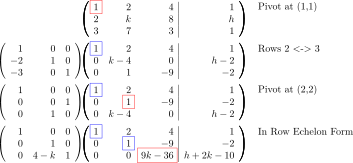

In [7]:
k = sym.Symbol('k'); h = sym.Symbol('h')
Ab = sym.Matrix([[1,2,4,1],[2,k,8,h],[3,7,3,1]]); matrices = [[None, Ab]]; pivots = []; txt=[]
# we could use row ops, but we want a computational layout:
#    A=A.elementary_row_op('n->n+km', k=-3, row1=2,row2=0 );A
#    A=A.elementary_row_op('n<->m',row1=1,row2=2);A

E1=sym.eye(3);E1[1:,0]=[-2,-3]; A1=E1*Ab;                               matrices.append([E1,A1]); pivots.append((1,1));txt.append('Pivot at (1,1)')
E2=sym.eye(3);E2=E2.elementary_row_op('n<->m',row1=1,row2=2); A2=E2*A1; matrices.append([E2,A2]); pivots.append(None); txt.append('Rows 2 <-> 3')
E3=sym.eye(3);E3[2,1]=4-k; A3=E3*A2;                                    matrices.append([E3,A3]); pivots.append((2,2));txt.append('Pivot at (2,2)')
pivots.append((3,3)); txt.append('In Row Echelon Form')

mat_rep, submatrix_locs, pivot_locs, txt_with_locs,mat_format = nM.ge_layout( matrices, Nrhs=1, pivots=pivots, txt=txt, formater=lambda x: sym.latex(x))

itikz.fetch_or_compile_svg( jinja2.Template( nM.GE_TEMPLATE ).render( preamble=nM.preamble, extension=nM.extension,
                                                                      mat_rep=mat_rep, mat_format=mat_format, submatrix_locs=submatrix_locs, pivot_locs=pivot_locs, txt_with_locs=txt_with_locs),
                            prefix='sol_rhs_', working_dir='/tmp/itikz', debug=False,
                            **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True), nexec=4, keep_file="/tmp/foo" )

## 2.4 Back-Substitution: Row Echelon Form, Back-substitution, Standard Form

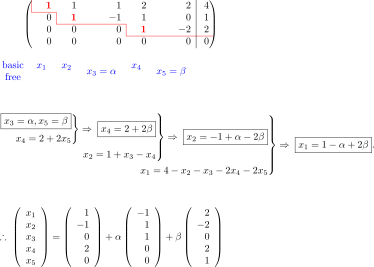

In [9]:
%%itikz --temp-dir  --file-prefix test_  --template article --tex-packages=amssymb,cascade,systeme,nicematrix,tikz,relsize --crop --tikz-libraries=decorations.pathreplacing

% ==================================================================================== Decorate matrix
    \NiceMatrixOptions{code-for-last-row = \color{blue}, code-for-first-row = \color{red}}
    $\begin{pNiceArray}{*5r|r}[left-margin = 4pt, first-col, last-row,
        code-before =
        {
        % ----------------------------------------------------------------------- Row-echelon form Path
        \tikz \draw[red] (row-1-|col-1) -- (row-2-|col-1)
                      -- (row-2-|col-2) -- (row-3-|col-2)
                      -- (row-3-|col-4) -- (row-4-|col-4)
                      -- (row-4-|col-7);
        }
    ]
        & \color{red}{\mathbf{1}}   & 1                       &  1 &  2                       &  2 & \;  4 \\
        & 0                         & \color{red}{\mathbf{1}} & -1 &  1                       &  0 & \;  1 \\
        & 0                         & 0                       &  0 &  \color{red}{\mathbf{1}} & -2 & \;  2 \\
        & 0                         & 0                       &  0 &  0                       &  0 & \;  0 \\
    % ------------------------------------------------------------------------------------ Basic and Free Variables
    \color{blue}{\begin{matrix} \\ \text{basic}\\ \text{free} \end{matrix}}
        & \begin{matrix} x_1        \\             \end{matrix}
        & \begin{matrix} x_2        \\             \end{matrix}
        & \begin{matrix}            \\  x_3=\alpha \end{matrix}
        & \begin{matrix} x_4        \\             \end{matrix}
        & \begin{matrix}            \\  x_5=\beta  \end{matrix}
        &
    \end{pNiceArray}$
    % ==================================================================================== Solve by Back-substitution
    \vspace{1cm}       % below the figure; inkscape cropping fails otherwise...

    % ------------------------------------------------------------------------------------ Solve
        {\ShortCascade%
           {\ShortCascade%
              {\ShortCascade%
                 {$\boxed{x_3 = \alpha, x_5=\beta}$}%
                 {$x_4 = 2 + 2 x_5$}%
                 {$\;\Rightarrow\; \boxed{x_4 =  2 + 2 \beta}$}%
              }%
              {$x_2 = 1 +x_3-x_4$}%
              {$\;\Rightarrow\; \boxed{x_2 = -1+\alpha-2\beta}$}%
           }%
           {$x_1 = 4 - x_2 - x_3 - 2 x_4 -2 x_5$}%
           {$\;\Rightarrow \; \boxed{x_1 =  1-\alpha+2\beta}.$}
        }%
    %& % --------------------------------------------------------------------------------- Standard Form
    \vspace{1cm}

        {$\; \therefore\;        \left( \begin{array}{r} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right)
                        =        \left( \begin{array}{r}  1  \\  -1 \\   0 \\   2 \\   0 \end{array} \right)
                        + \alpha \left( \begin{array}{r} -1  \\   1 \\   1 \\   0 \\   0 \end{array} \right)
                        + \beta  \left( \begin{array}{r}  2  \\  -2 \\   0 \\   2 \\   1 \end{array} \right)
             $
        }

# 3 Geometric Figures

## 3.1 Graph with Arrows

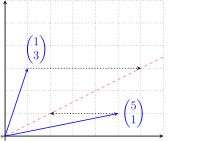

In [10]:
%%itikz --temp-dir --file-prefix graph- --template pic --use-xetex --scale 0.8 --tex-packages=amsmath

% axes
  \draw[thick,>=stealth,->]           (0,-0.2) -- (0,6);
  \draw[thick,>=stealth,->]           (-0.2,0) -- (7,0);

% grid lines
   \draw[step=1.0,black,thin,dotted,xshift=1cm,yshift=1cm] (-1,-1) grid (6,5);

% draw the output line
  \draw[thin,draw=red, dashed] (-0.2,-0.1) -- (7,3.5)  node[right, text=blue, text width=5em] {};

% starting vector blue, transformed vector red
  \draw[thick,>=stealth,->,draw=blue] (0,0) -- (5,1)  node[right, text=blue,  text width=5em] {\large $\mathbf{\begin{pmatrix} 5 \\ 1 \end{pmatrix}}$};
  \draw[thick,>=stealth,->,dotted,draw=black] (5,1) -- (2,1);
  \draw[thick,>=stealth,->,draw=blue] (0,0) -- (1,3)  node[text=blue, label={[xshift=0.3cm, yshift=-0.1cm]\large $\color{blue}{\mathbf{\begin{pmatrix} 1 \\ 3 \end{pmatrix}}}$}] (x2) {};
  \draw[thick,>=stealth,->,dotted,draw=black] (1,3) -- (6,3);

## 3.2 Parallelograms

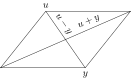

In [11]:
%%itikz --temp-dir --file-prefix graph- --template pic --use-xetex --scale 2 --tex-packages=amsmath --tikz-libraries quotes

    \node (n) [draw, minimum width=3cm, minimum height=2cm, xslant=0.8] {};
    \draw (n.south west) to ["$u+y$",pos=0.7,sloped] (n.north east)
          (n.north west) node[above] {$u$} 
                         to ["$u-y$",pos=0.3,sloped] (n.south east) node[below] {$y$};

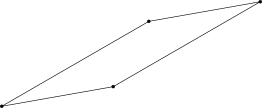

In [12]:
%%itikz --temp-dir --file-prefix graph- --template pic --use-xetex --scale 2 --tex-packages=tkz-euclide --tikz-libraries arrows
\tkzDefPoint(0,0){A}
\tkzDefPoint(30:3){B}
\tkzDefShiftPointCoord[B](10:2){C}
\tkzDefShiftPointCoord[A](10:2){D}
\tkzDrawPolygon(A,...,D)
\tkzDrawPoints(A,...,D)

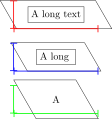

In [13]:
%%itikz --temp-dir --file-prefix graph- --template pic --use-xetex --scale 1 --tikz-libraries shapes.geometric
\tikzstyle{every node}=[trapezium, draw, minimum width=3cm,
trapezium left angle=120, trapezium right angle=60]

\node[trapezium stretches=false,minimum height=1cm]
    at (0,0) {A};

\node[trapezium stretches=false,minimum height=1cm]
    at (0,1.5) {\fbox{A long }};

\node[trapezium stretches=false,minimum height=1cm]
    at (0,3) {\fbox{A long text}};

\draw[thick,green,|-|] (-1.5,-.5) -- (1.5,-0.5);
\draw[thick,green,|-|] (-1.5,0.5) -- (-1.5,-0.5);

\draw[thick,blue,|-|] (-1.5,1) -- (1.5,1);
\draw[thick,blue,|-|] (-1.5,1) -- (-1.5,2);

\draw[thick,red,|-|] (-1.5,2.5) -- (1.5,2.5);
\draw[thick,red,|-|] (-1.5,2.5) -- (-1.5,3.5);


## 3.3 Arcs

### 3.3.1 Arcs with pgfplot

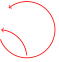

In [14]:
%%itikz --temp-dir --file-prefix graph- --template pic --use-xetex --scale 1 --tex-packages=pgfplots --tikz-libraries=calc
\def\centerarc[#1](#2)(#3:#4:#5)% Syntax: [draw options] (center) (initial angle:final angle:radius)
    { \draw[#1] ($(#2)+({#5*cos(#3)},{#5*sin(#3)})$) arc (#3:#4:#5); }

\centerarc[red,thick,->](0,0)(5:85:1) ;
\centerarc[red,thick,->](1,1)(-160:130:1) ;



### 3.3.2 Arcs with tkz-euclide

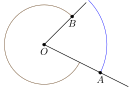

In [15]:
%%itikz --temp-dir --file-prefix graph- --template pic --use-xetex --scale 1 --tex-packages=tkz-euclide --tikz-libraries=calc
\tkzDefPoint(0,0){O}
\tkzDefPoint(2,-1){A}
\tkzDefPoint(1,1){B}
\tkzDrawArc[color=blue](O,A)(B)
\tkzDrawArc[color=brown](O,B)(A)
\tkzDrawArc(O,B)(A)
\tkzDrawLines[add = 0 and .5](O,A O,B)
\tkzDrawPoints(O,A,B)
\tkzLabelPoints[below](O,A,B)

### 3.1.3 Arcs with Tikz

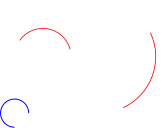

In [16]:
%%itikz --temp-dir --file-prefix graph- --template pic --use-xetex --scale 1 --tex-packages=amsmath --tikz-libraries=calc
\newcommand{\cercle}[4]{
\node[circle,inner sep=0,minimum size={2*#2}](a) at (#1) {};
\draw[red,thick] (a.#3) arc (#3:{#3+#4}:#2);
}
                  
\newcommand{\mycercle}[6]{
\node[circle,inner sep=0,minimum size={2*#2}](a) at (#1) {};
\draw[#6,line width=#5] (a.#3) arc (#3:{#3+#4}:#2);
}

\coordinate (OR) at (0.00, 0.00);
 \coordinate (center) at (3,2);

\cercle{center}{2cm}{25}{-90}
![\cercle{1,2}{1cm}{15}{130}][1]

\mycercle {OR} {0.5cm} {0} {270} {1.00} {blue} ;
